$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

#Pendant Droplet

We want to compute the shape of a drop pendant from a plate. 

<a name="fig1"></a><img src="pics/pendant drop.png" width=250> <p>
<center> Figure 1 </center>

We can use the very same approach with a coordinate system positioned at the drop's apex.  

The Laplace Young now needs to account for the direction of x-axis. It is in vector notation

$$\kappa=\frac{\vb{g} \cdot \vb{x}}{l^2}\quad.\tag{1}$$


where $l$ is the capillary length, $\vb{g}$ the gravitational vector, and $\vb{x}$ the coordinate on the interface. 

Please change below sessile droplet program to calculate the pendant droplet.

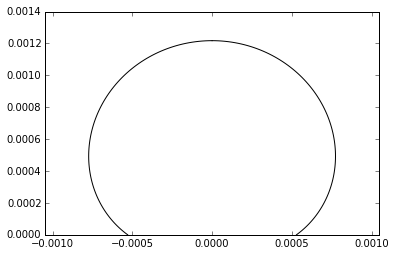

In [12]:
#Boilerplates
%matplotlib inline
import matplotlib.pylab as plt #plotting
import numpy as np #linspace and array
from scipy.integrate import odeint #ODE integration
from scipy.optimize import fmin #find minimum of a function using clever algorithms
from math import * #mathematical functions

rho=3e3    #density difference droplet and surrounding liquid
gamma=0.07  #surface tension coefficient
g=10.      #gravitational acceleration
l=sqrt(gamma/g/rho) #capillary number


AD=pi*(1e-3)**2/2. #area of the droplet
alpha=.8*pi #contact angle
#Psi we want to calculate
psis = np.linspace(0., alpha, 100.) #List of psi's

#estimate for intital curvature B based on a circle and account for the contact angle
r=sqrt(AD/(alpha-0.5*sin(2*alpha))) #radius of a cut circle with contact angle alpha
initialB=B=1/r #and set as initial B as an approximation of Eq. (3)

#Initial value for X and Y
yinit=np.array([0,0])

#ODE to integrate the droplet surface in X and Y direction as a function of psi
def droplet_ode(y,psi):
    Q=y[0]/(l**2)-B
    dxdpsi=sin(psi)/Q
    dydpsi=-cos(psi)/Q
    return np.array([dxdpsi,dydpsi])

#return value is the error between given and the calculated area
def findB(b):
    global B #Python assumes without global derective that B would be a local variable
    B=b[0] #b is an array of size 1, but B a float
    yy=odeint(droplet_ode,yinit,psis) #solve the ODE with initial values and for the psis
    droparea=2*np.trapz(np.fabs(yy[:,1]),x=np.fabs(yy[:,0]))
    return fabs(AD-droparea)

newB = fmin(func=findB, x0=initialB,disp=0)
B=newB[0]
#Calculate final shape with correct B
yy=odeint(droplet_ode,yinit,psis)
#Plotting
x=yy[:,0]
y=yy[:,1]
plt.plot(y,x-x[-1],'k',-y,x-x[-1],'k');
plt.axis('equal');